In [1]:
! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 33.4M    0 15996    0     0  15996      0  0:36:31  0:00:01  0:36:30 13475
  0 33.4M    0  111k    0     0  57150      0  0:10:13  0:00:02  0:10:11 53014
  0 33.4M    0  239k    0     0  81790      0  0:07:08  0:00:03  0:07:05 79305
  1 33.4M    1  415k    0     0   103k      0  0:05:29  0:00:04  0:05:25  101k
  1 33.4M    1  639k    0     0   127k      0  0:04:27  0:00:05  0:04:22  132k
  2 33.4M    2  895k    0     0   149k      0  0:03:49  0:00:06  0:03:43  179k
  3 33.4M    3 1167k    0     0   166k      0  0:03:25  0:00:07  0:03:18  213k
  4 33.4M    4 1519k    0     0   189k      0  0:03:00  0:00:08  0:02:52  255k
  5 33.4M    5 1935k    0     0   215k      0  0:02

In [2]:
! "C:\Program Files\7-Zip\7z.exe" x  gear_images.zip -o./ -y -r

### x : eXtract files with full paths
### -o{Directory} : set Output directory
### -y : assume Yes on all queries
### -r[-|0] : Recurse subdirectories


7-Zip 18.05 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2018-04-30

Scanning the drive for archives:
1 file, 35058300 bytes (34 MiB)

Extracting archive: gear_images.zip
--
Path = gear_images.zip
Type = zip
Physical Size = 35058300

Everything is Ok

Folders: 12
Files: 2122
Size:       35640403
Compressed: 35058300


In [3]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

directory_list = list()
for root, dirs, files in os.walk("gear_images", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))

print(directory_list)

['gear_images\\axes', 'gear_images\\boots', 'gear_images\\carabiners', 'gear_images\\crampons', 'gear_images\\gloves', 'gear_images\\hardshell_jackets', 'gear_images\\harnesses', 'gear_images\\helmets', 'gear_images\\insulated_jackets', 'gear_images\\pulleys', 'gear_images\\rope', 'gear_images\\tents']


gear_images/axes/
gear_images/axes/100172.jpeg
gear_images/boots/
gear_images/boots/10018755x1036824_zm.jpeg
gear_images/carabiners/
gear_images/carabiners/10007284x1065726_zm.jpeg
gear_images/crampons/
gear_images/crampons/100169.jpeg
gear_images/gloves/
gear_images/gloves/10020529x1000273_zm.jpeg
gear_images/hardshell_jackets/
gear_images/hardshell_jackets/10116634x1038116_zm.jpeg
gear_images/harnesses/
gear_images/harnesses/100177.jpeg
gear_images/helmets/
gear_images/helmets/100536.jpeg
gear_images/insulated_jackets/
gear_images/insulated_jackets/10167913x1063714_zm.jpeg
gear_images/pulleys/
gear_images/pulleys/10082019_zm.jpeg
gear_images/rope/
gear_images/rope/100524.jpeg
gear_images/tents/
gear_images/tents/10093342x1013403_zm.jpeg


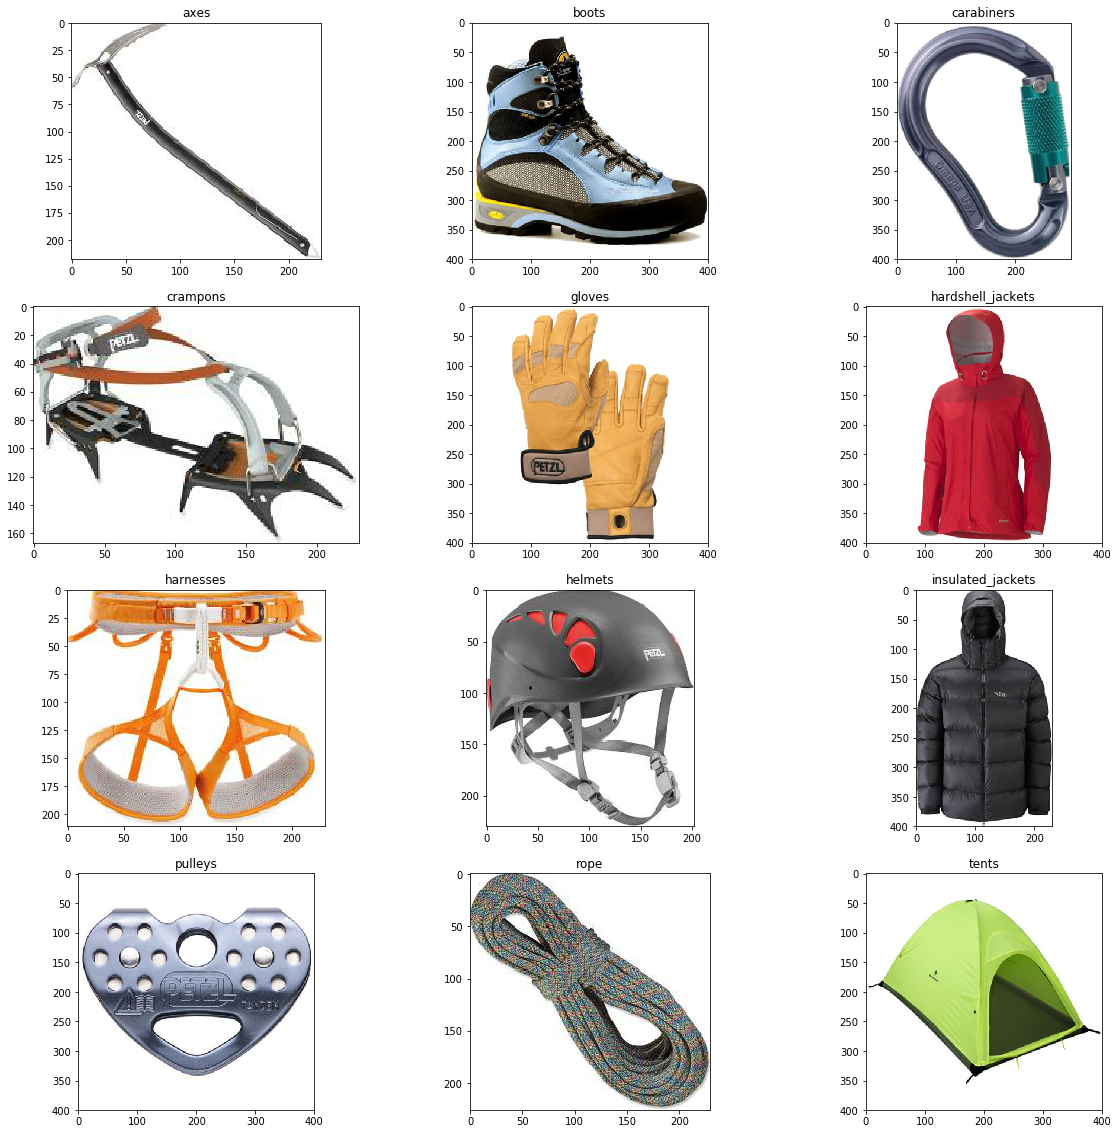

In [5]:
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
plt.figure(figsize=(20,20))

i = 1
for Dir in dirs:
    path = root + '/' +  Dir + '/'
    print(path)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    path_file = path +  onlyfiles[0]
    print(path_file)
 
    image = plt.imread(path_file) 
    ax = plt.subplot(4,3,i)
    plt.imshow(image)
    

    ax.title.set_text(Dir)
    i = i + 1
 

In [6]:
from PIL import Image
for Dir in dirs:
    path = root + '/' +  Dir + '/'
    
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    newpath = root + '/' + 'resized ' + Dir + '/' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    size = 128, 128
    for file in onlyfiles:
        path_file = path +  file
        
        img = Image.open(path_file) # image extension *.png,*.jpg
        img.thumbnail(size, Image.ANTIALIAS)
        desized_size = 128
        org_size = img.size
        new_img = Image.new("RGB",(128,128),'white')
        
        # 2nd param defines the top left coord
        new_img.paste(img,((desized_size-org_size[0])//2,(desized_size-org_size[1])//2))
        new_img.save(root + '/' + 'resized ' + Dir + '/' + file) # format may what u want ,*.png,*jpg,*.gif
   
        
        

gear_images/axes/
gear_images/boots/
gear_images/carabiners/
gear_images/crampons/
gear_images/gloves/
gear_images/hardshell_jackets/
gear_images/harnesses/
gear_images/helmets/
gear_images/insulated_jackets/
gear_images/pulleys/
gear_images/rope/
gear_images/tents/
gear_images/resized axes/
gear_images/resized boots/
gear_images/resized carabiners/
gear_images/resized crampons/
gear_images/resized gloves/
gear_images/resized hardshell_jackets/
gear_images/resized harnesses/
gear_images/resized helmets/
gear_images/resized insulated_jackets/
gear_images/resized pulleys/
gear_images/resized rope/
gear_images/resized tents/


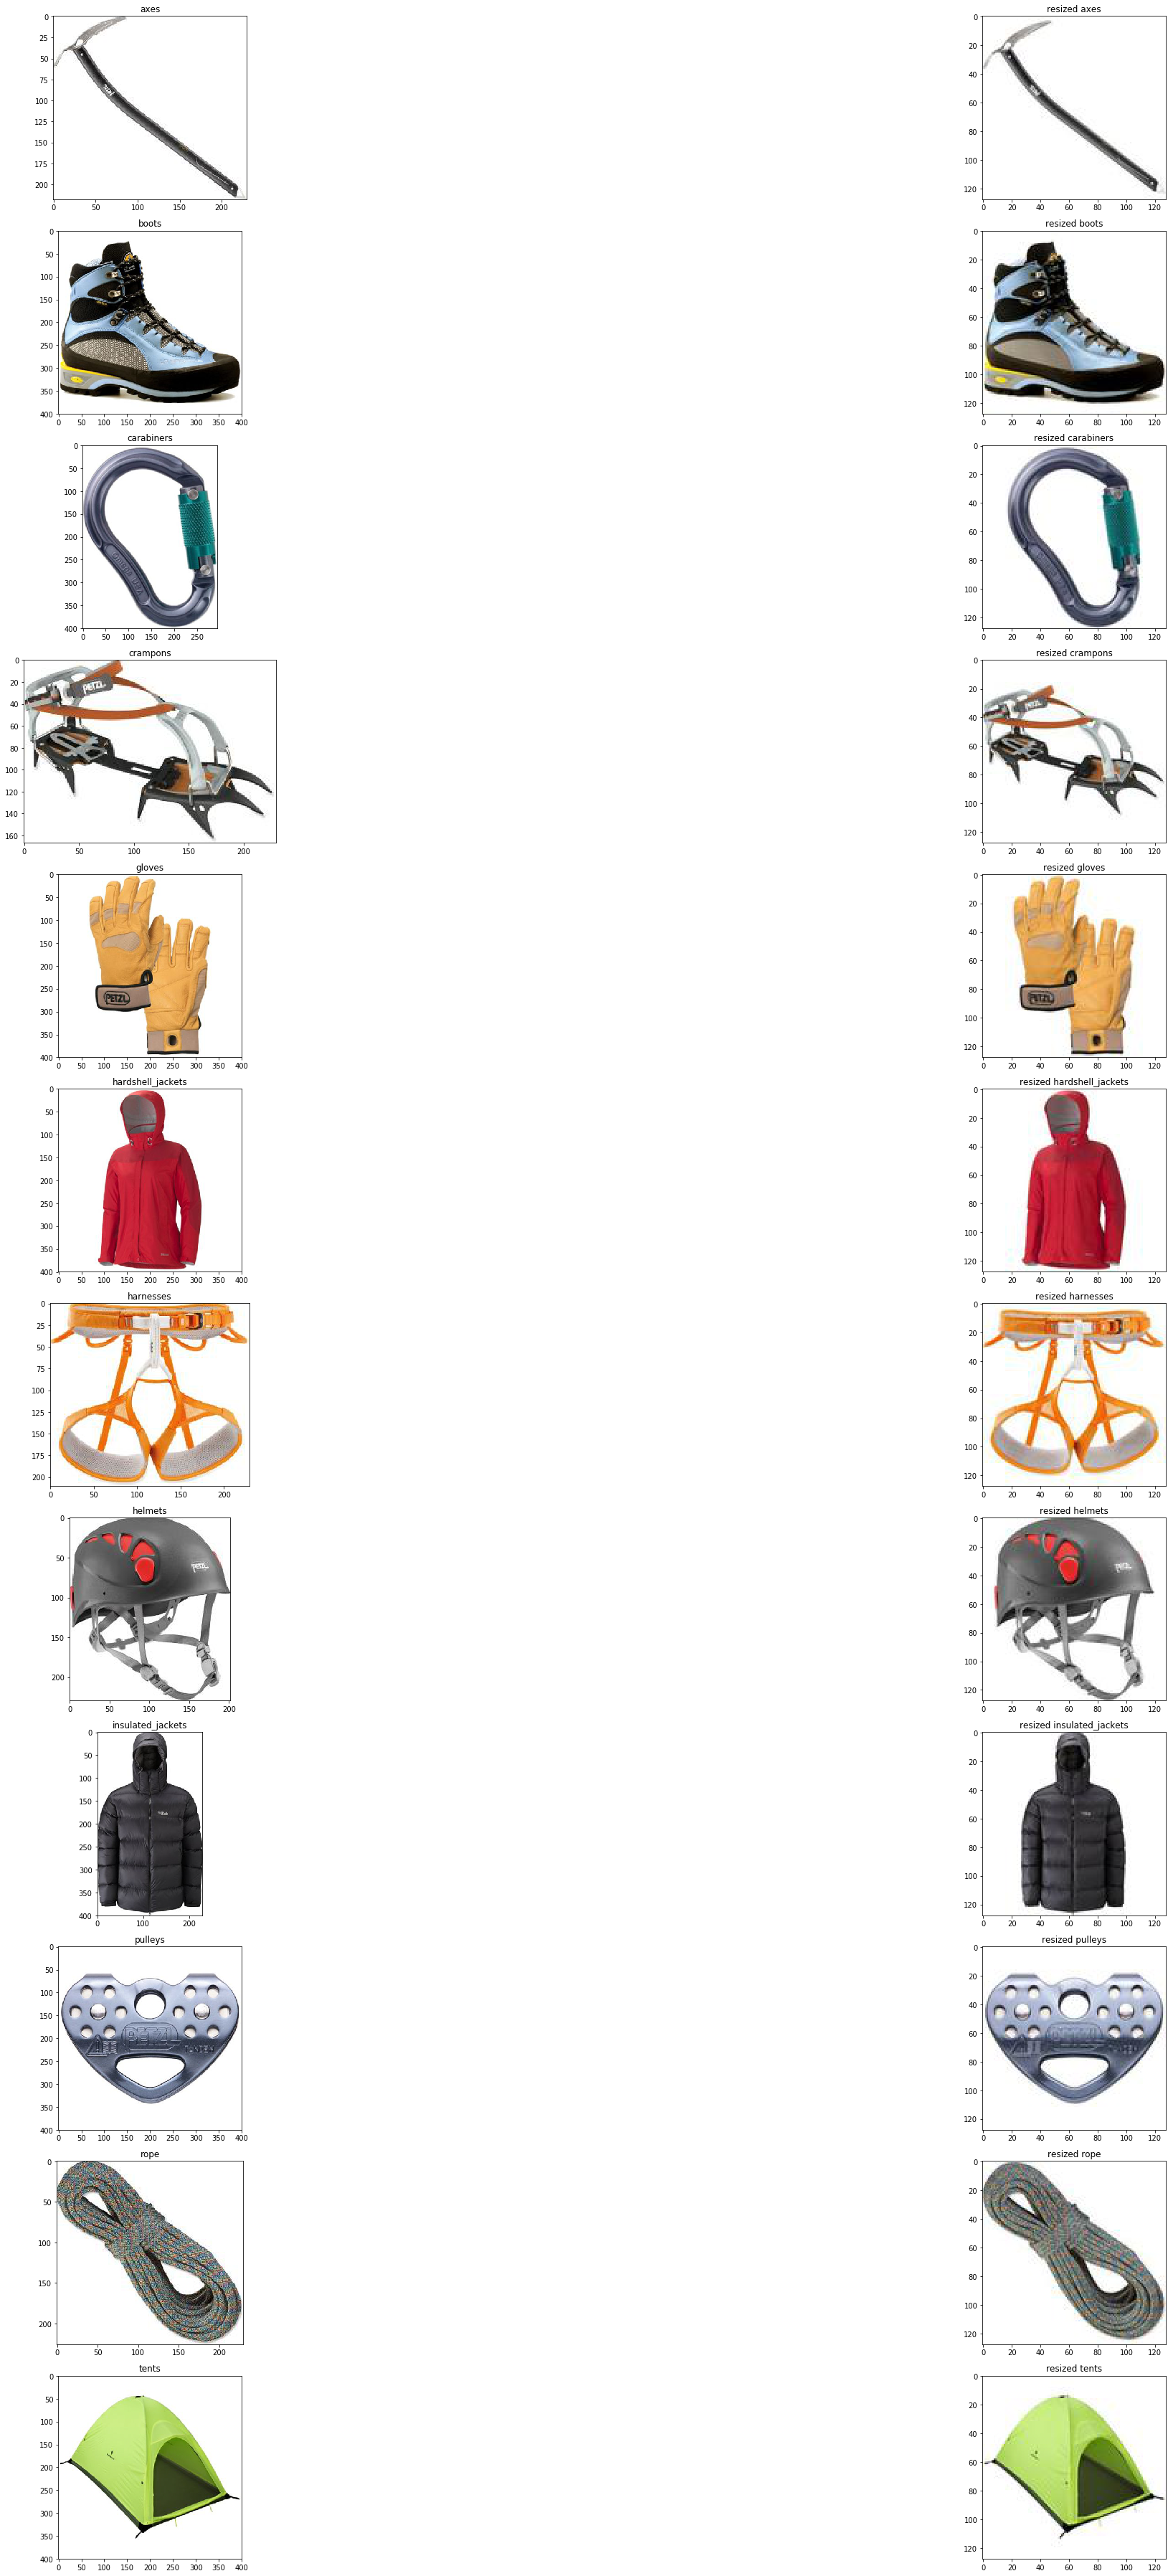

In [7]:
#plt.figure()

plt.figure(figsize=(50,50))

i = 1
for Dir in dirs:
    path = root + '/' +  Dir + '/'
    print(path)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    path_file = path +  onlyfiles[0]
    image = plt.imread(path_file)    
    ax = plt.subplot(12,2,i)
    plt.imshow(image)
    ax.title.set_text(Dir)

    i = i + 2
    

i = 2
for Dir in dirs:
    path = root + '/' + 'resized ' + Dir + '/'
    print(path)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    path_file = path +  onlyfiles[0]
    image = plt.imread(path_file)    
    ax = plt.subplot(12,2,i)
    plt.imshow(image)
    ax.title.set_text('resized ' + Dir)

    i = i + 2

plt.tight_layout()

In [10]:
import sys

! pip install azure-cognitiveservices-vision-customvision

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

#pre-req: sign in to customvision.ai to register a free account

ENDPOINT = "https://southcentralus.api.cognitive.microsoft.com"

# Replace with a valid key
training_key = "8d312045d35b4575a3d90e3d136a2d90"
prediction_key = "e12f64d497a440b1950a12f621a113bf"

trainer = CustomVisionTrainingClient(training_key, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("ProjectTest")

Creating project...


In [13]:
project.id

'1dc65bc2-ac4c-4338-b774-cd82a156d510'

In [14]:
# Make two tags in the new project
In_tag = trainer.create_tag(project.id, "Insulated_jacket")
H_tag = trainer.create_tag(project.id, "Hard_jacket")

In [15]:
path = root + '/' + 'resized insulated_jackets' 
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print ("Adding images...")
for image in os.listdir(path):

        with open(os.path.join(path, image), mode="rb") as img_data: 

            trainer.create_images_from_data(project.id, img_data.read(), [ In_tag.id ])


path = root + '/' + 'resized hardshell_jackets'

#onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for image in os.listdir(path):

        with open(os.path.join(path, image), mode="rb") as img_data: 

            trainer.create_images_from_data(project.id, img_data.read(), [ H_tag.id ])
    

Adding images...


In [16]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!


In [17]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
#from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models


predictor = CustomVisionPredictionClient(prediction_key, endpoint=ENDPOINT)

path = root + '/' + 'testimages'

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

for i in onlyfiles:
    with open(os.path.join(path, i), mode="rb") as test_data:
        results = predictor.predict_image(project.id, test_data.read())

# Display the results.
    for prediction in results.predictions:
        print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))

['121398.jpeg', '2031197_604_main.jpg', '880724.jpeg']
	Hard_jacket: 81.01%
	Insulated_jacket: 6.58%
	Insulated_jacket: 99.90%
	Hard_jacket: 0.13%
	Hard_jacket: 85.95%
	Insulated_jacket: 28.01%
